### Required Libraries

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from sklearn.metrics.pairwise import euclidean_distances
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Reading Dataset

In [4]:
df_veh =pd.read_csv("vehicle.csv")
df_veh

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,Non_car
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,Non_car
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,Non_car
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,Non_car
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,93,39.0,87.0,183.0,64.0,8,169.0,40.0,20.0,134,200.0,422.0,149.0,72.0,7.0,25.0,188.0,195,car
842,89,46.0,84.0,163.0,66.0,11,159.0,43.0,20.0,159,173.0,368.0,176.0,72.0,1.0,20.0,186.0,197,Non_car
843,106,54.0,101.0,222.0,67.0,12,222.0,30.0,25.0,173,228.0,721.0,200.0,70.0,3.0,4.0,187.0,201,car
844,86,36.0,78.0,146.0,58.0,7,135.0,50.0,18.0,124,155.0,270.0,148.0,66.0,0.0,25.0,190.0,195,car


### Datatypes

In [3]:
df_veh.dtypes

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
class                           object
dtype: object

### Null Values

In [4]:
df_veh.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

### Missing Value Percentage

In [ ]:
# to know the 
(df_veh.isnull().sum() /df_veh.index.size) *100

compactness                    0.000000
circularity                    0.591017
distance_circularity           0.472813
radius_ratio                   0.709220
pr.axis_aspect_ratio           0.236407
max.length_aspect_ratio        0.000000
scatter_ratio                  0.118203
elongatedness                  0.118203
pr.axis_rectangularity         0.354610
max.length_rectangularity      0.000000
scaled_variance                0.354610
scaled_variance.1              0.236407
scaled_radius_of_gyration      0.236407
scaled_radius_of_gyration.1    0.472813
skewness_about                 0.709220
skewness_about.1               0.118203
skewness_about.2               0.118203
hollows_ratio                  0.000000
class                          0.000000
dtype: float64

In [ ]:
# all less than 1%

### Drop the Missing Values

In [5]:
df_veh.dropna(inplace=True)

In [26]:
df_veh.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

### Distribution

In [6]:
cols=df_veh.drop('class',axis=1)

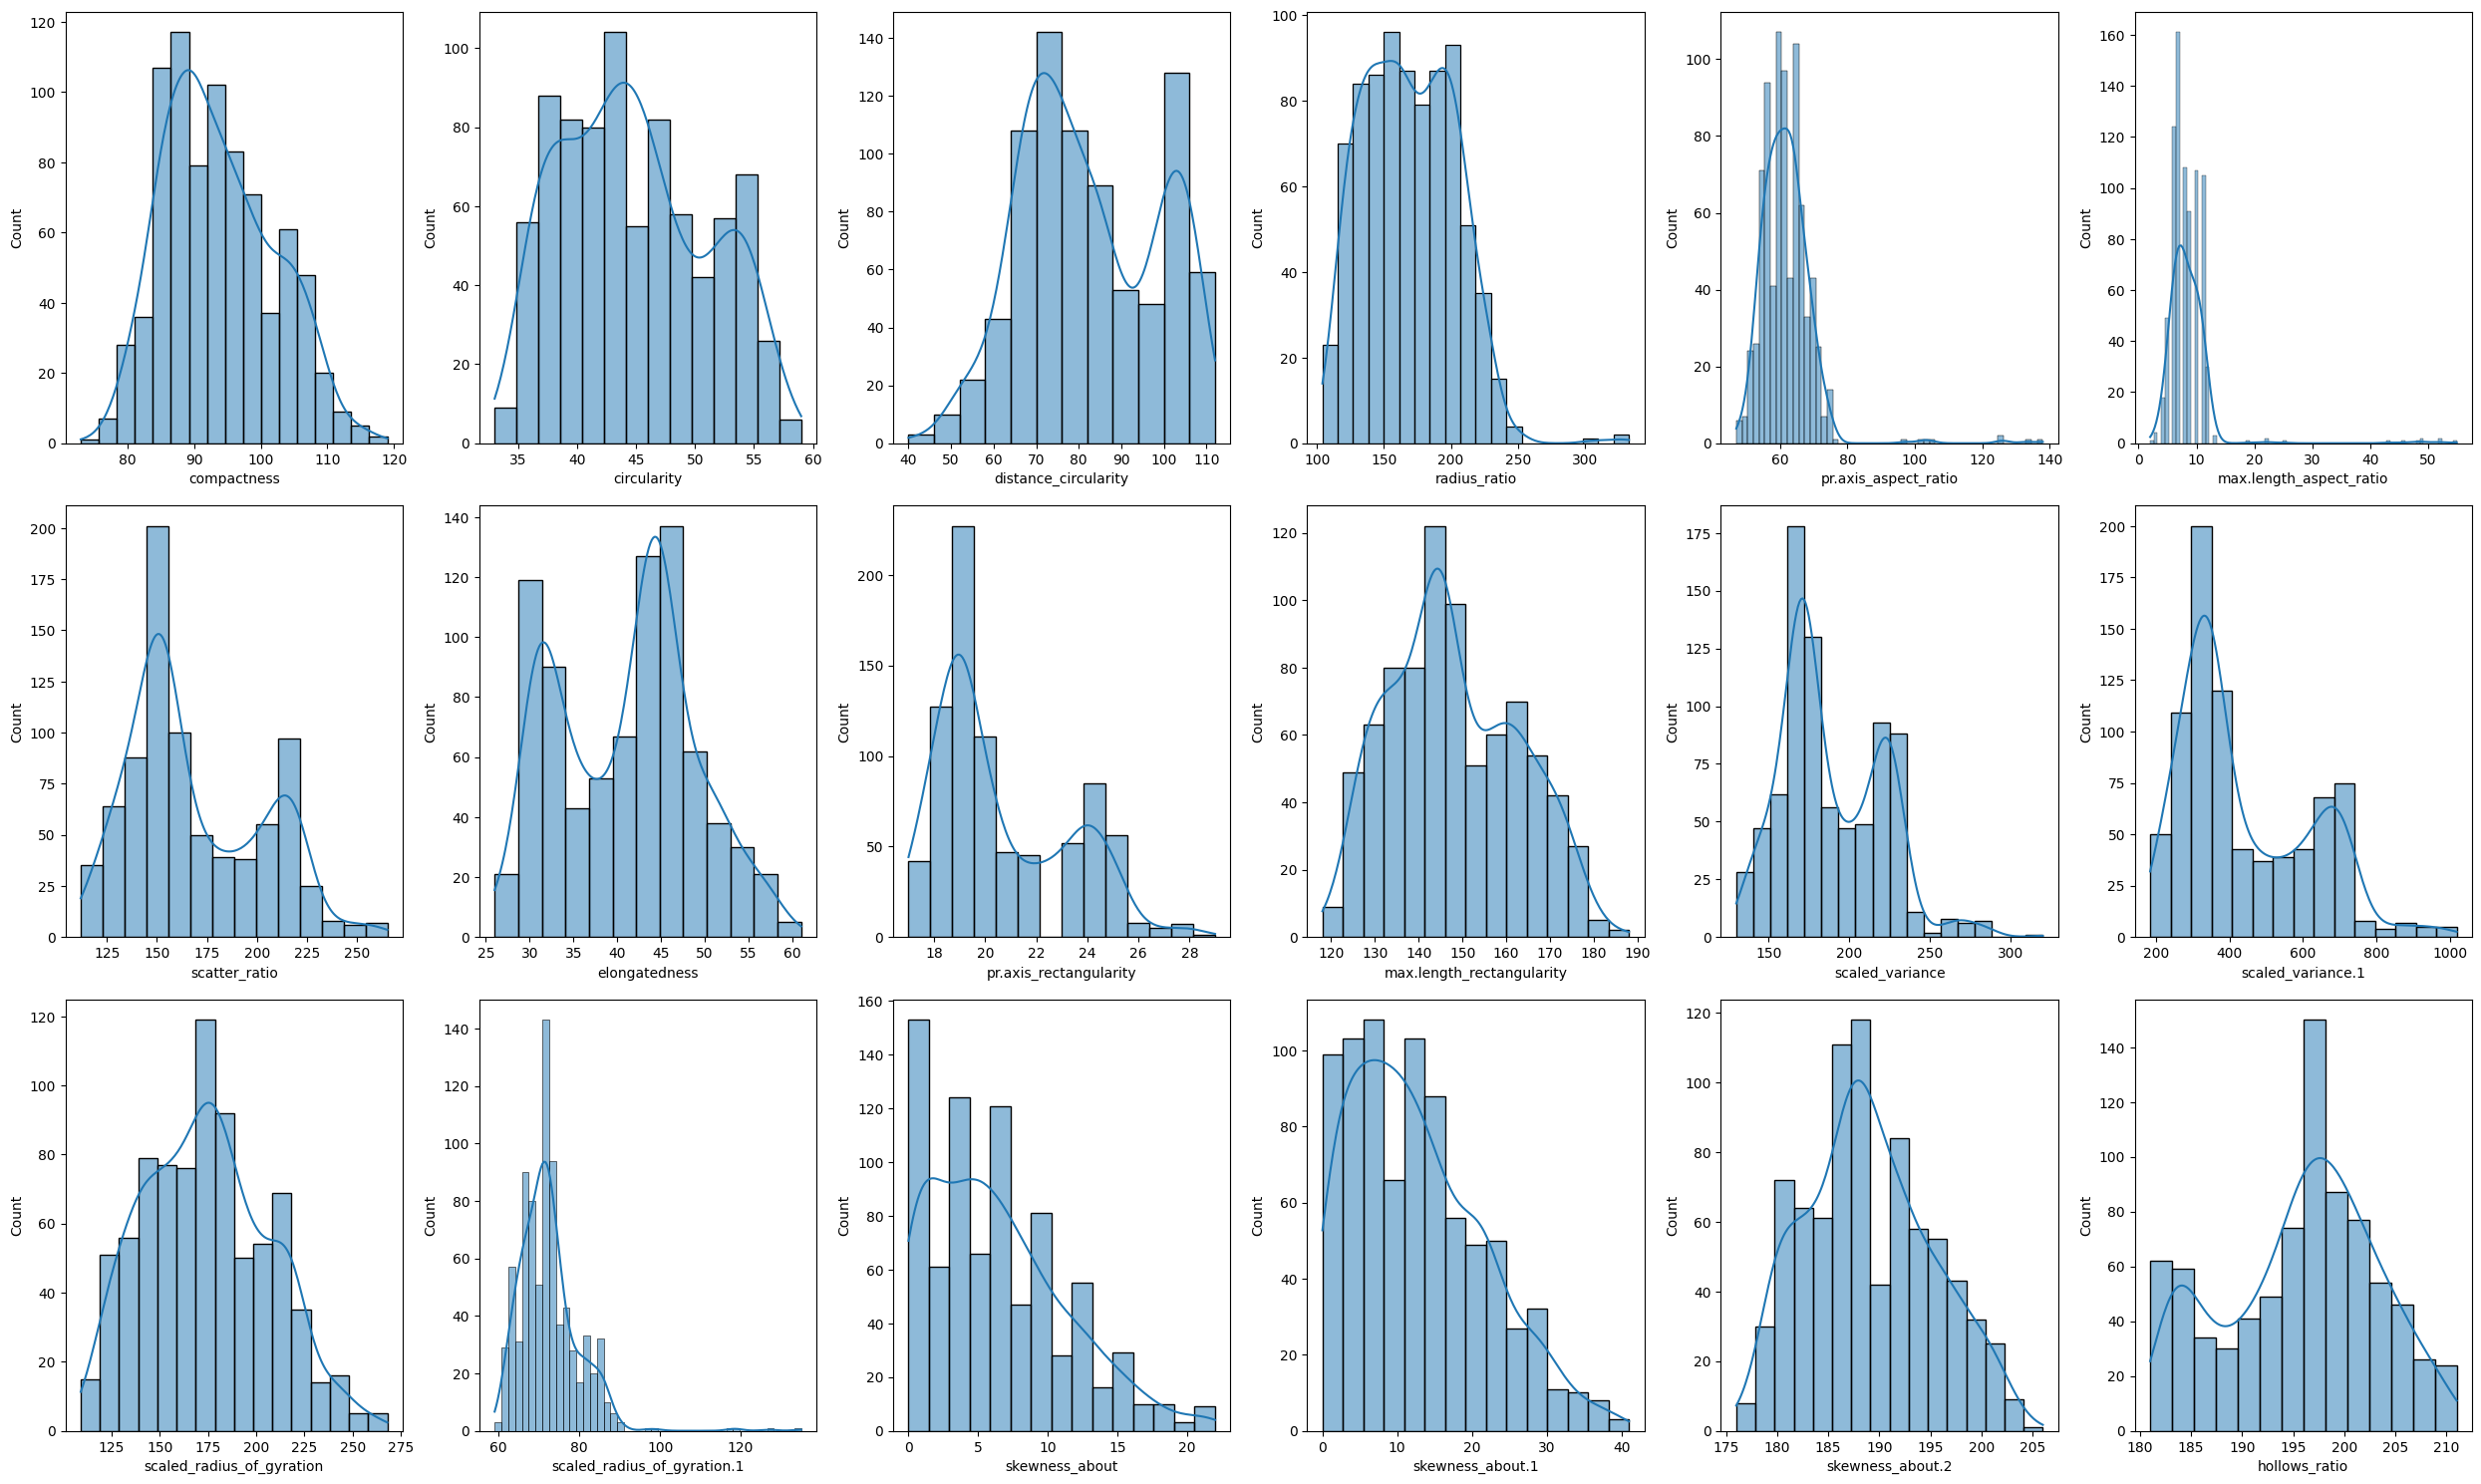

In [ ]:
fig, ax= plt.subplots(3,6, figsize=(25,15))
for i, subplot in zip(cols, ax.flatten()):
    sns.histplot(df_veh[i], ax=subplot,kde=True)
plt.tight_layout()
plt.show()

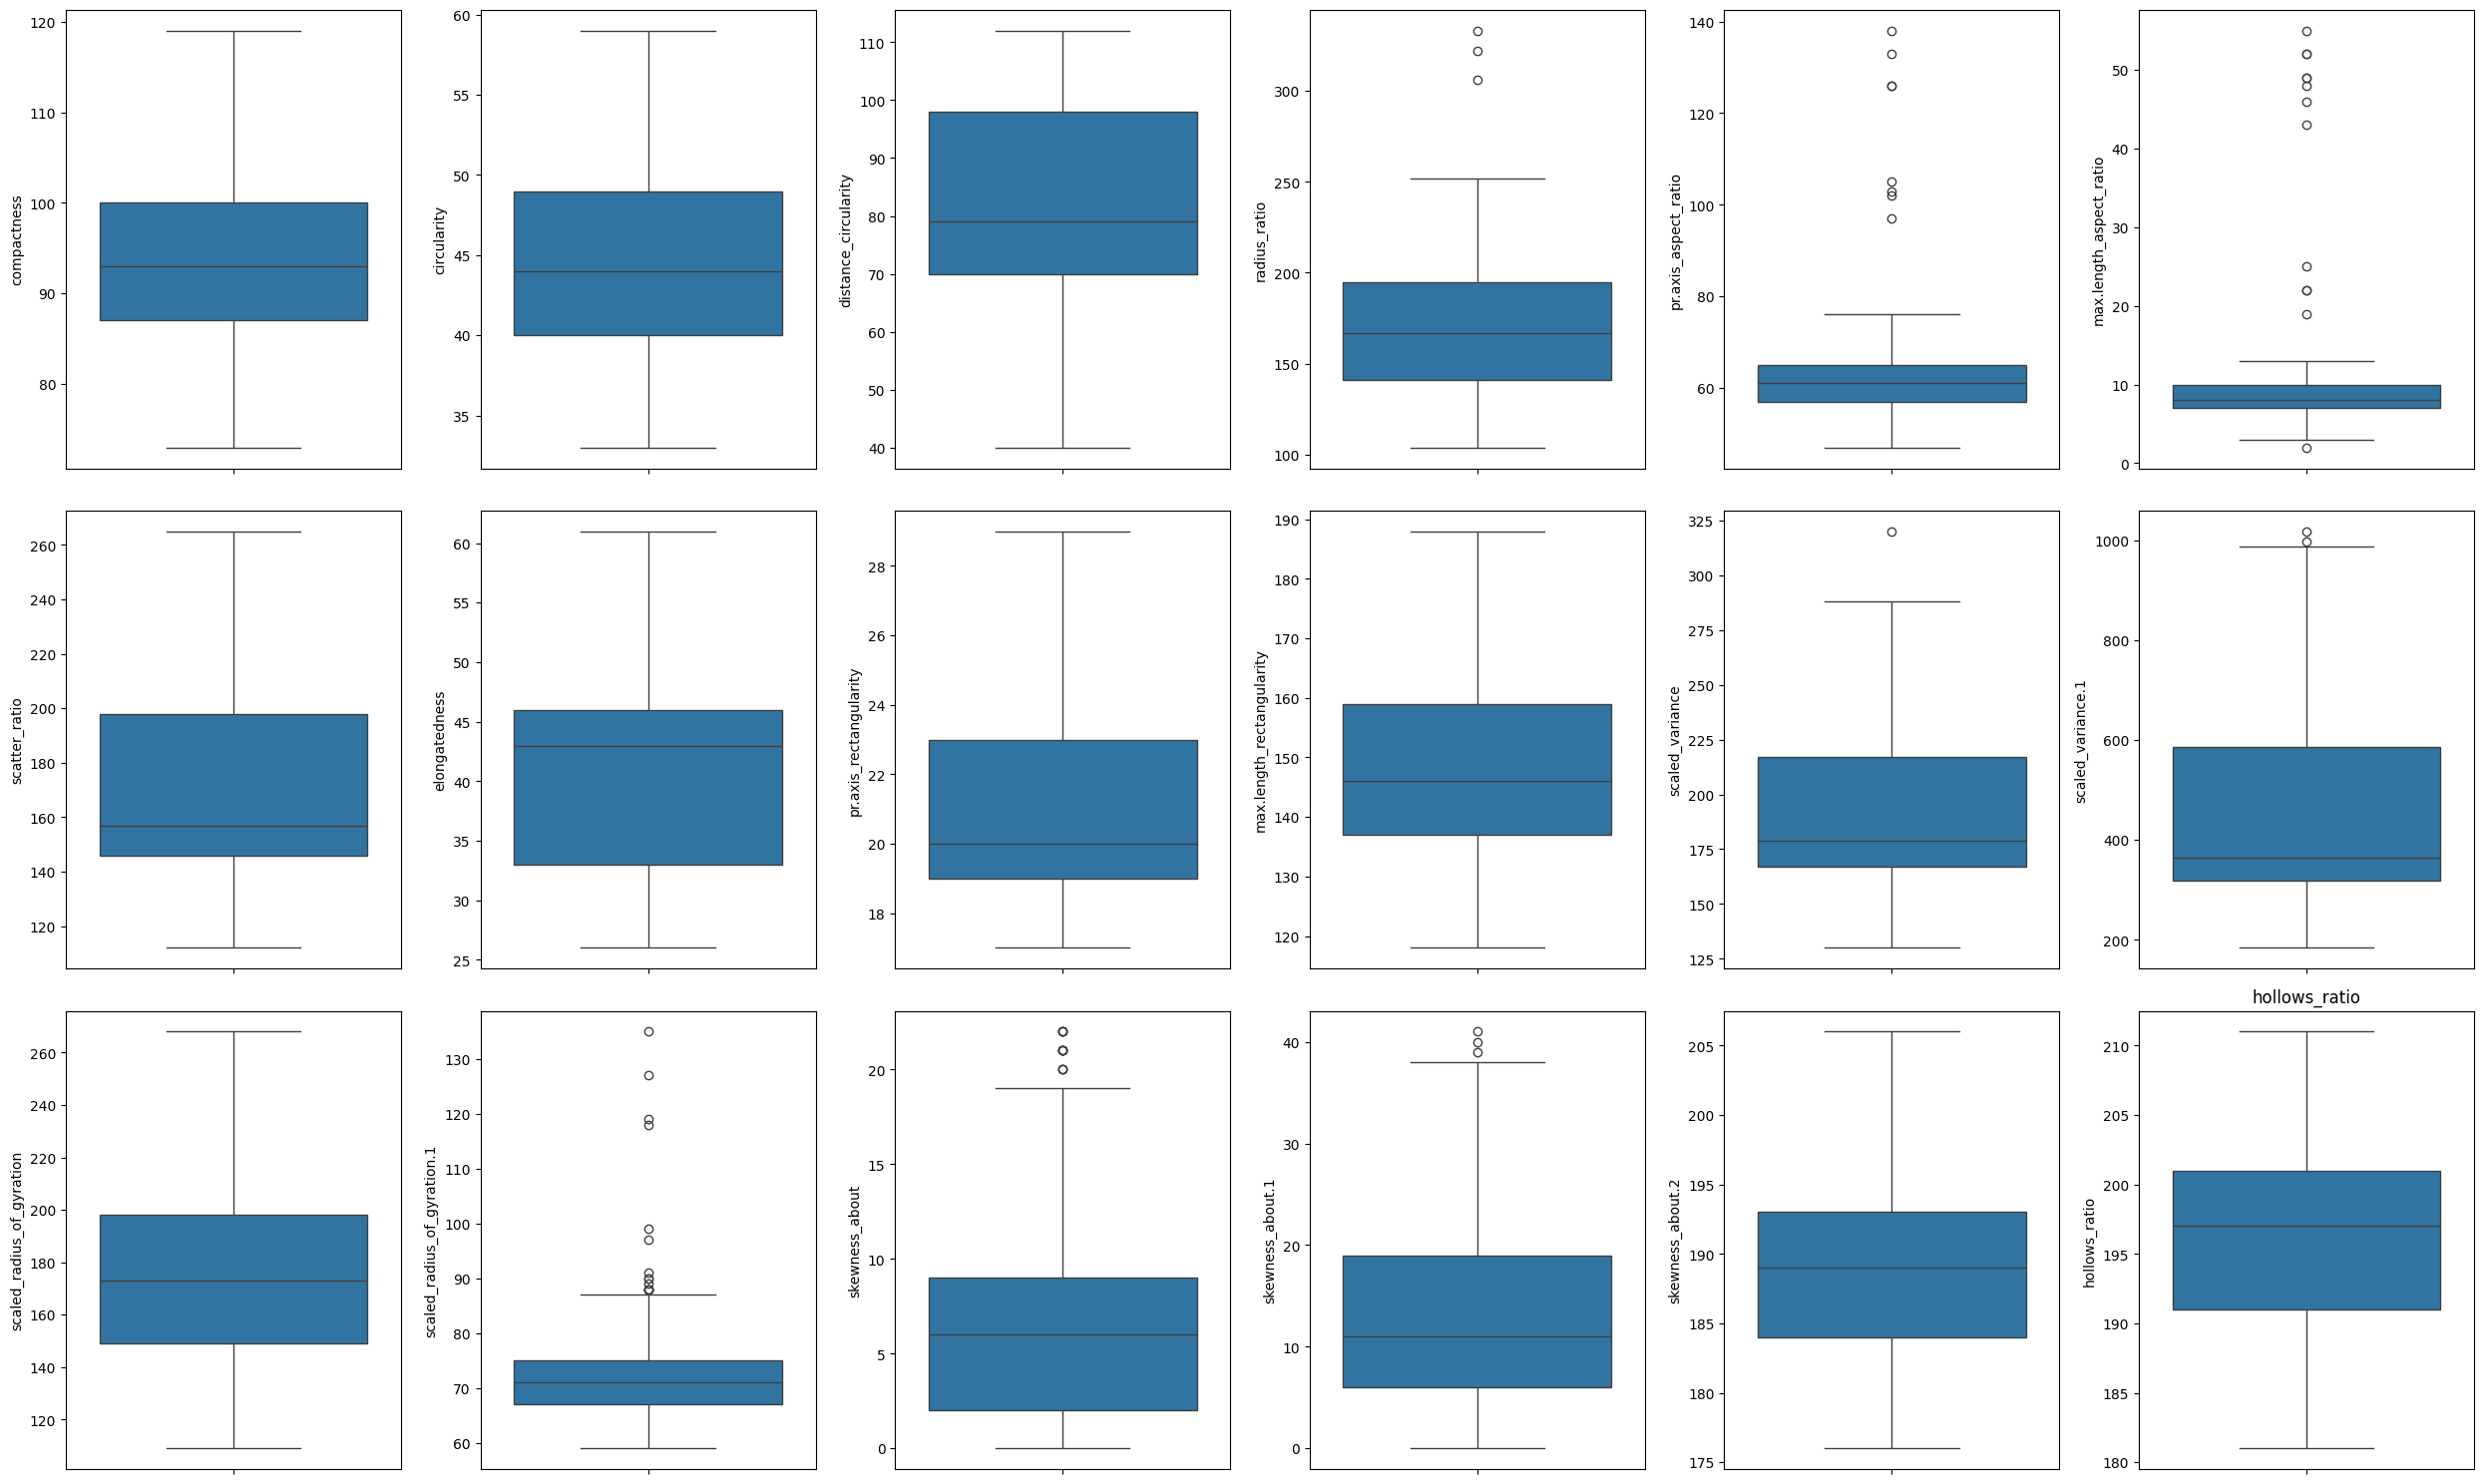

In [ ]:
fig, ax= plt.subplots(3,6, figsize=(25,15))
for i, subplot in zip(cols, ax.flatten()):
    sns.boxplot(df_veh[i], ax=subplot)
    plt.title(i)
plt.tight_layout()
plt.show()

### Outlier Treatment

In [7]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [8]:
for i in cols:
    ll,ul = remove_outlier(df_veh[[i]])
    df_veh[i]=np.where(df_veh[i]>ul,ul,df_veh[i])
    df_veh[i]=np.where(df_veh[i]<ll,ll,df_veh[i])
    print(i)
    print(ll,ul)

compactness
67.5 119.5
circularity
26.5 62.5
distance_circularity
28.0 140.0
radius_ratio
60.0 276.0
pr.axis_aspect_ratio
45.0 77.0
max.length_aspect_ratio
2.5 14.5
scatter_ratio
68.0 276.0
elongatedness
13.5 65.5
pr.axis_rectangularity
13.0 29.0
max.length_rectangularity
104.0 192.0
scaled_variance
92.0 292.0
scaled_variance.1
-84.0 988.0
scaled_radius_of_gyration
75.5 271.5
scaled_radius_of_gyration.1
55.0 87.0
skewness_about
-8.5 19.5
skewness_about.1
-13.5 38.5
skewness_about.2
170.5 206.5
hollows_ratio
176.0 216.0


In [9]:
df_veh.shape

(813, 19)

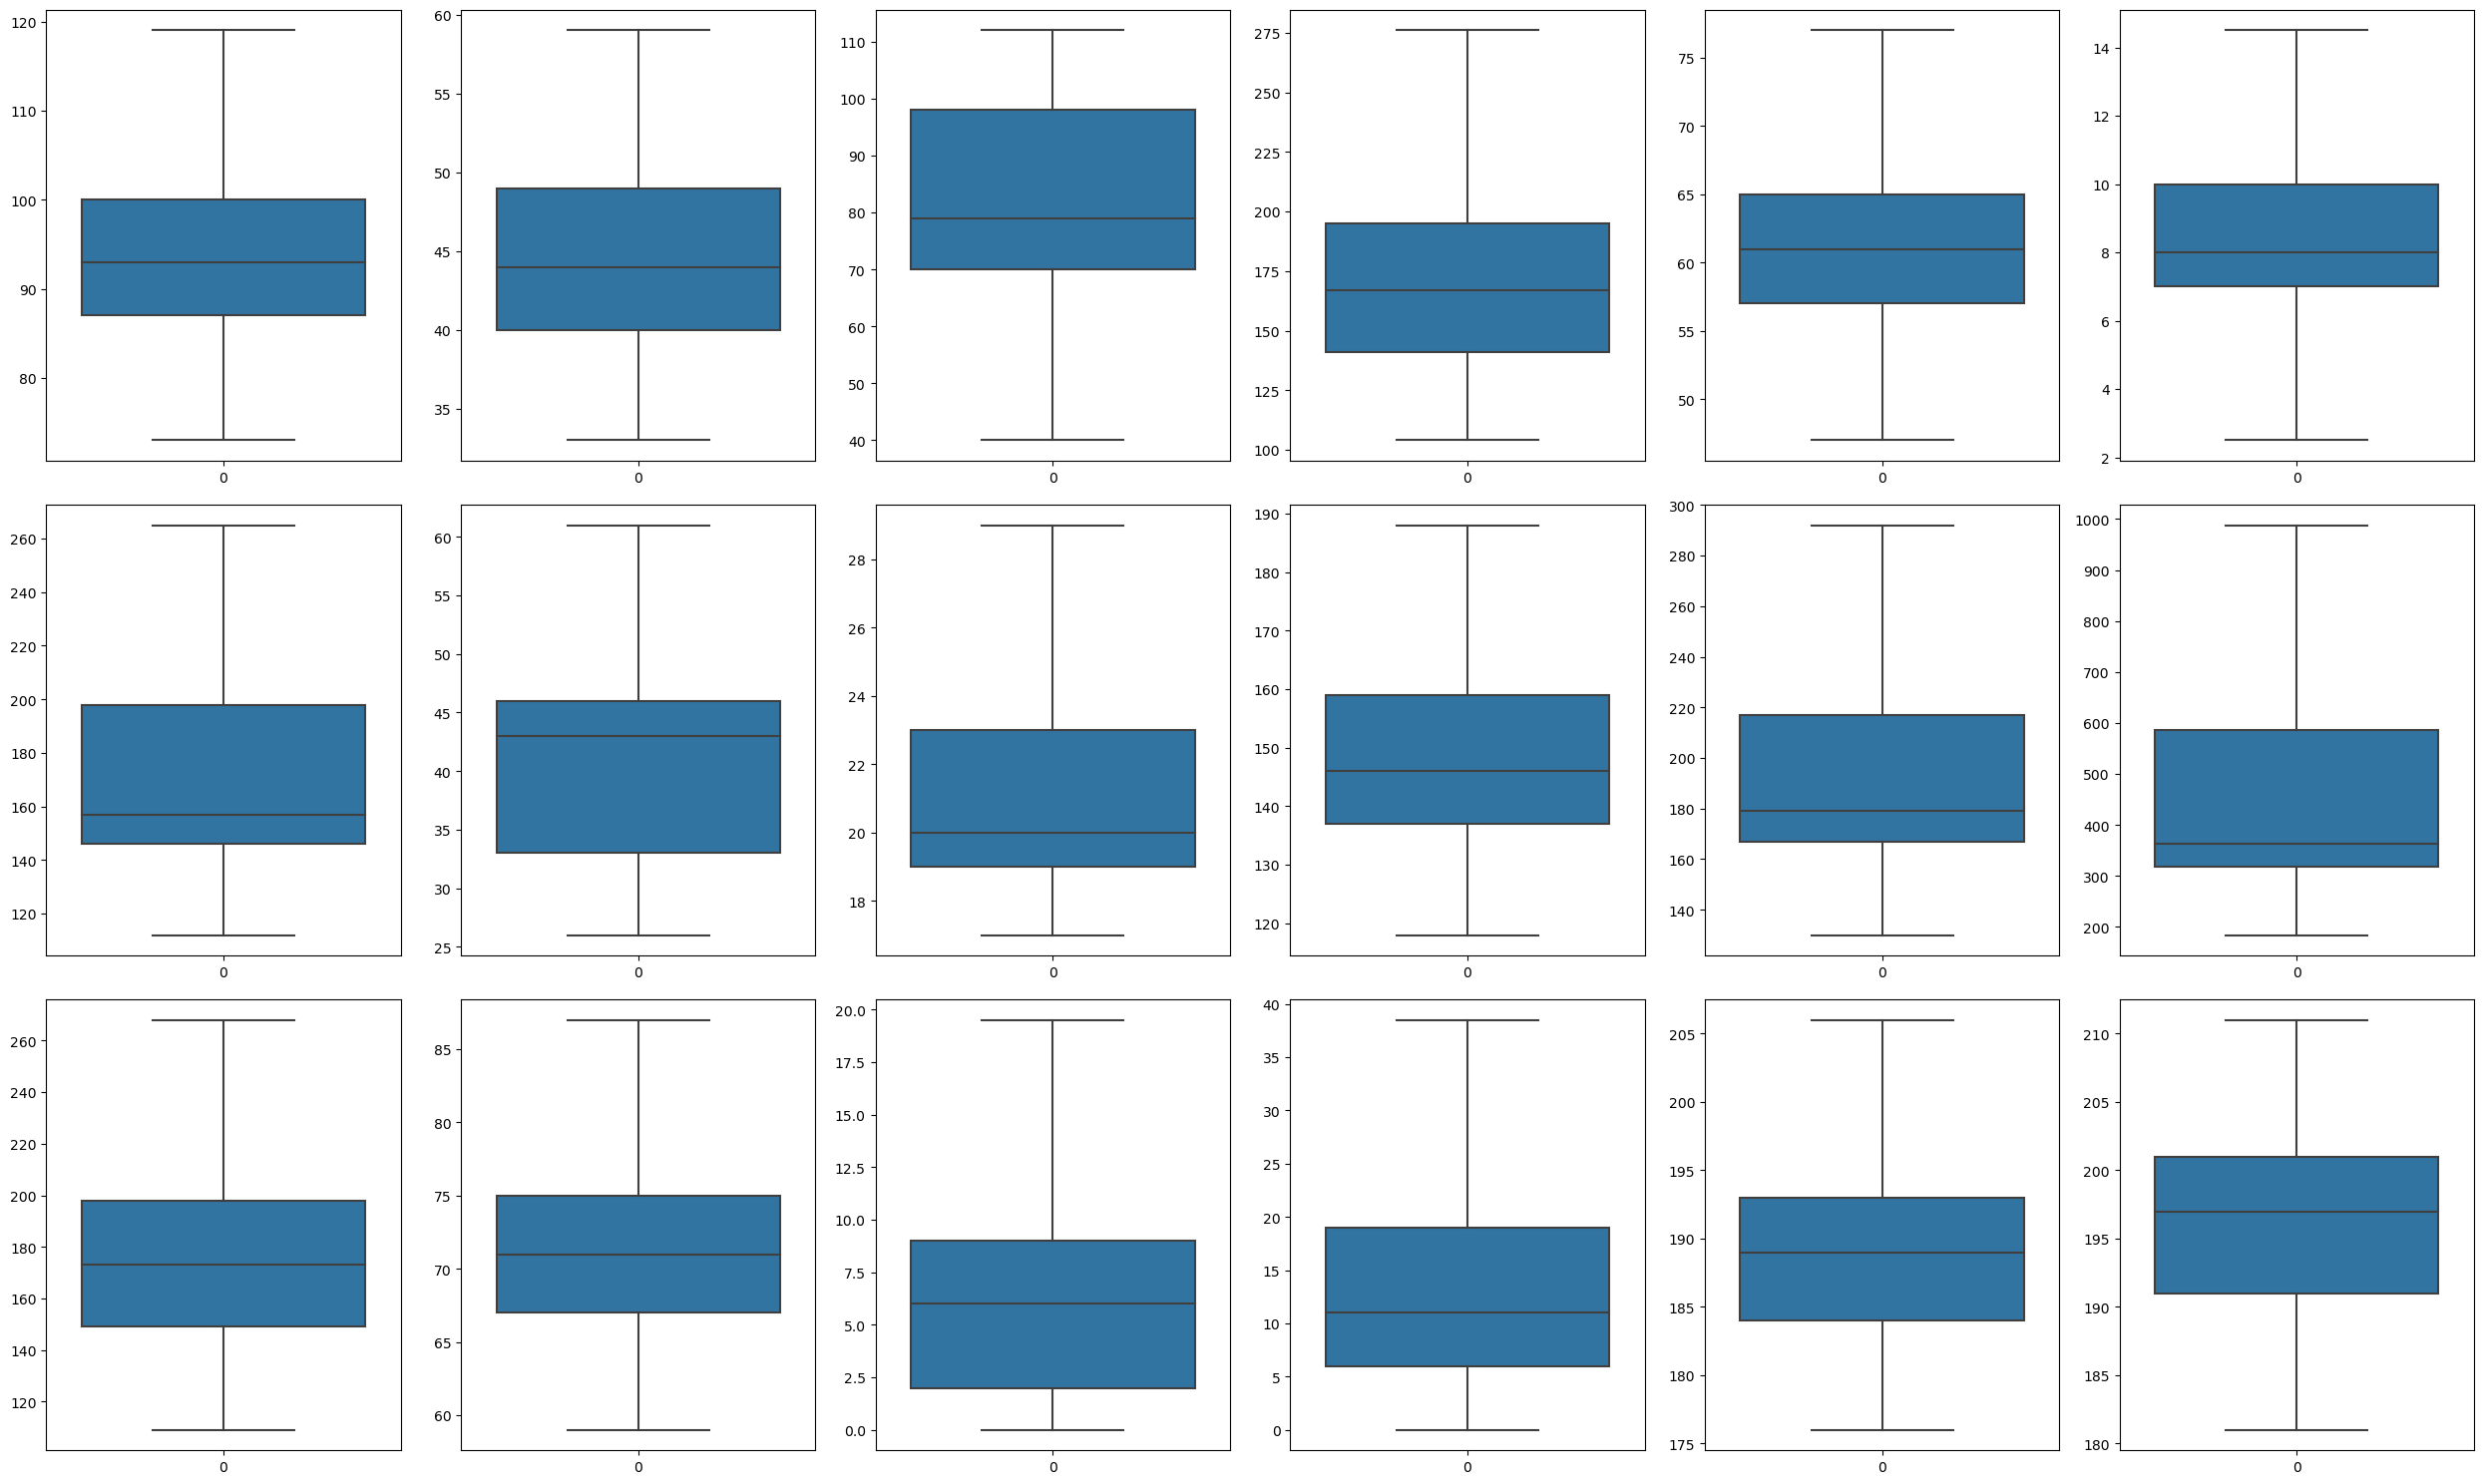

In [18]:
fig, ax= plt.subplots(3,6, figsize=(25,15))
for i, subplot in zip(cols, ax.flatten()):
    sns.boxplot(df_veh[i], ax=subplot)
plt.tight_layout()
plt.show()

### Independent and Dependent Variables

In [10]:
x= df_veh.drop('class',axis =1)
y=df_veh['class']

### Train Test Split

In [17]:
xtrain,xtest,ytrain,ytest =train_test_split(x,
                                            y,
                                            test_size=0.2,
                                            random_state=123)

### Decision Tree with Original Data without PCA

In [29]:
dt= DecisionTreeClassifier(random_state=100)
dt.fit(xtrain,ytrain)

y_pred_dt=dt.predict(xtest)

print(accuracy_score(ytest,y_pred_dt))
print(confusion_matrix(ytest,y_pred_dt))

0.9141104294478528
[[73 10]
 [ 4 76]]


In [11]:
x.shape

(813, 18)

In [ ]:
# We have used 18 features to build the decision tree model to get accuracy of 90%

In [32]:
x.corr()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
compactness,1.000000,0.689885,0.789955,0.688130,0.090557,0.150369,0.814026,-0.788051,0.814227,0.674902,0.764386,0.820240,0.581405,-0.258437,0.231648,0.168384,0.296195,0.372806
circularity,0.689885,1.000000,0.797704,0.623950,0.155023,0.251619,0.858149,-0.825108,0.856137,0.965366,0.806108,0.850932,0.935594,0.049070,0.141726,-0.001975,-0.113902,0.049331
distance_circularity,0.789955,0.797704,1.000000,0.771404,0.163386,0.265591,0.909023,-0.912713,0.897261,0.773459,0.865683,0.891789,0.705689,-0.238145,0.110280,0.277851,0.145258,0.343228
radius_ratio,0.688130,0.623950,0.771404,1.000000,0.667375,0.452460,0.743470,-0.795761,0.716210,0.570478,0.806788,0.731773,0.544636,-0.175348,0.044693,0.178079,0.375591,0.470895
pr.axis_aspect_ratio,0.090557,0.155023,0.163386,0.667375,1.000000,0.652093,0.113696,-0.191193,0.086992,0.133553,0.290375,0.100668,0.135663,0.173060,-0.059244,-0.040769,0.229702,0.257566
max.length_aspect_ratio,0.150369,0.251619,0.265591,0.452460,0.652093,1.000000,0.171445,-0.183242,0.167514,0.309180,0.331124,0.150069,0.197179,0.308329,0.016461,0.041210,-0.030543,0.139283
scatter_ratio,0.814026,0.858149,0.909023,0.743470,0.113696,0.171445,1.000000,-0.973413,0.991992,0.808154,0.950067,0.996396,0.795748,-0.045632,0.070118,0.227375,0.009967,0.138424
elongatedness,-0.788051,-0.825108,-0.912713,-0.795761,-0.191193,-0.183242,-0.973413,1.000000,-0.950345,-0.771099,-0.937846,-0.956858,-0.761563,0.119750,-0.046621,-0.201325,-0.117568,-0.233408
pr.axis_rectangularity,0.814227,0.856137,0.897261,0.716210,0.086992,0.167514,0.991992,-0.950345,1.000000,0.811979,0.935653,0.992119,0.792895,-0.033769,0.078701,0.231171,-0.017383,0.117202
max.length_rectangularity,0.674902,0.965366,0.773459,0.570478,0.133553,0.309180,0.808154,-0.771099,0.811979,1.000000,0.744760,0.796230,0.865240,0.031098,0.130356,0.013045,-0.108019,0.086792


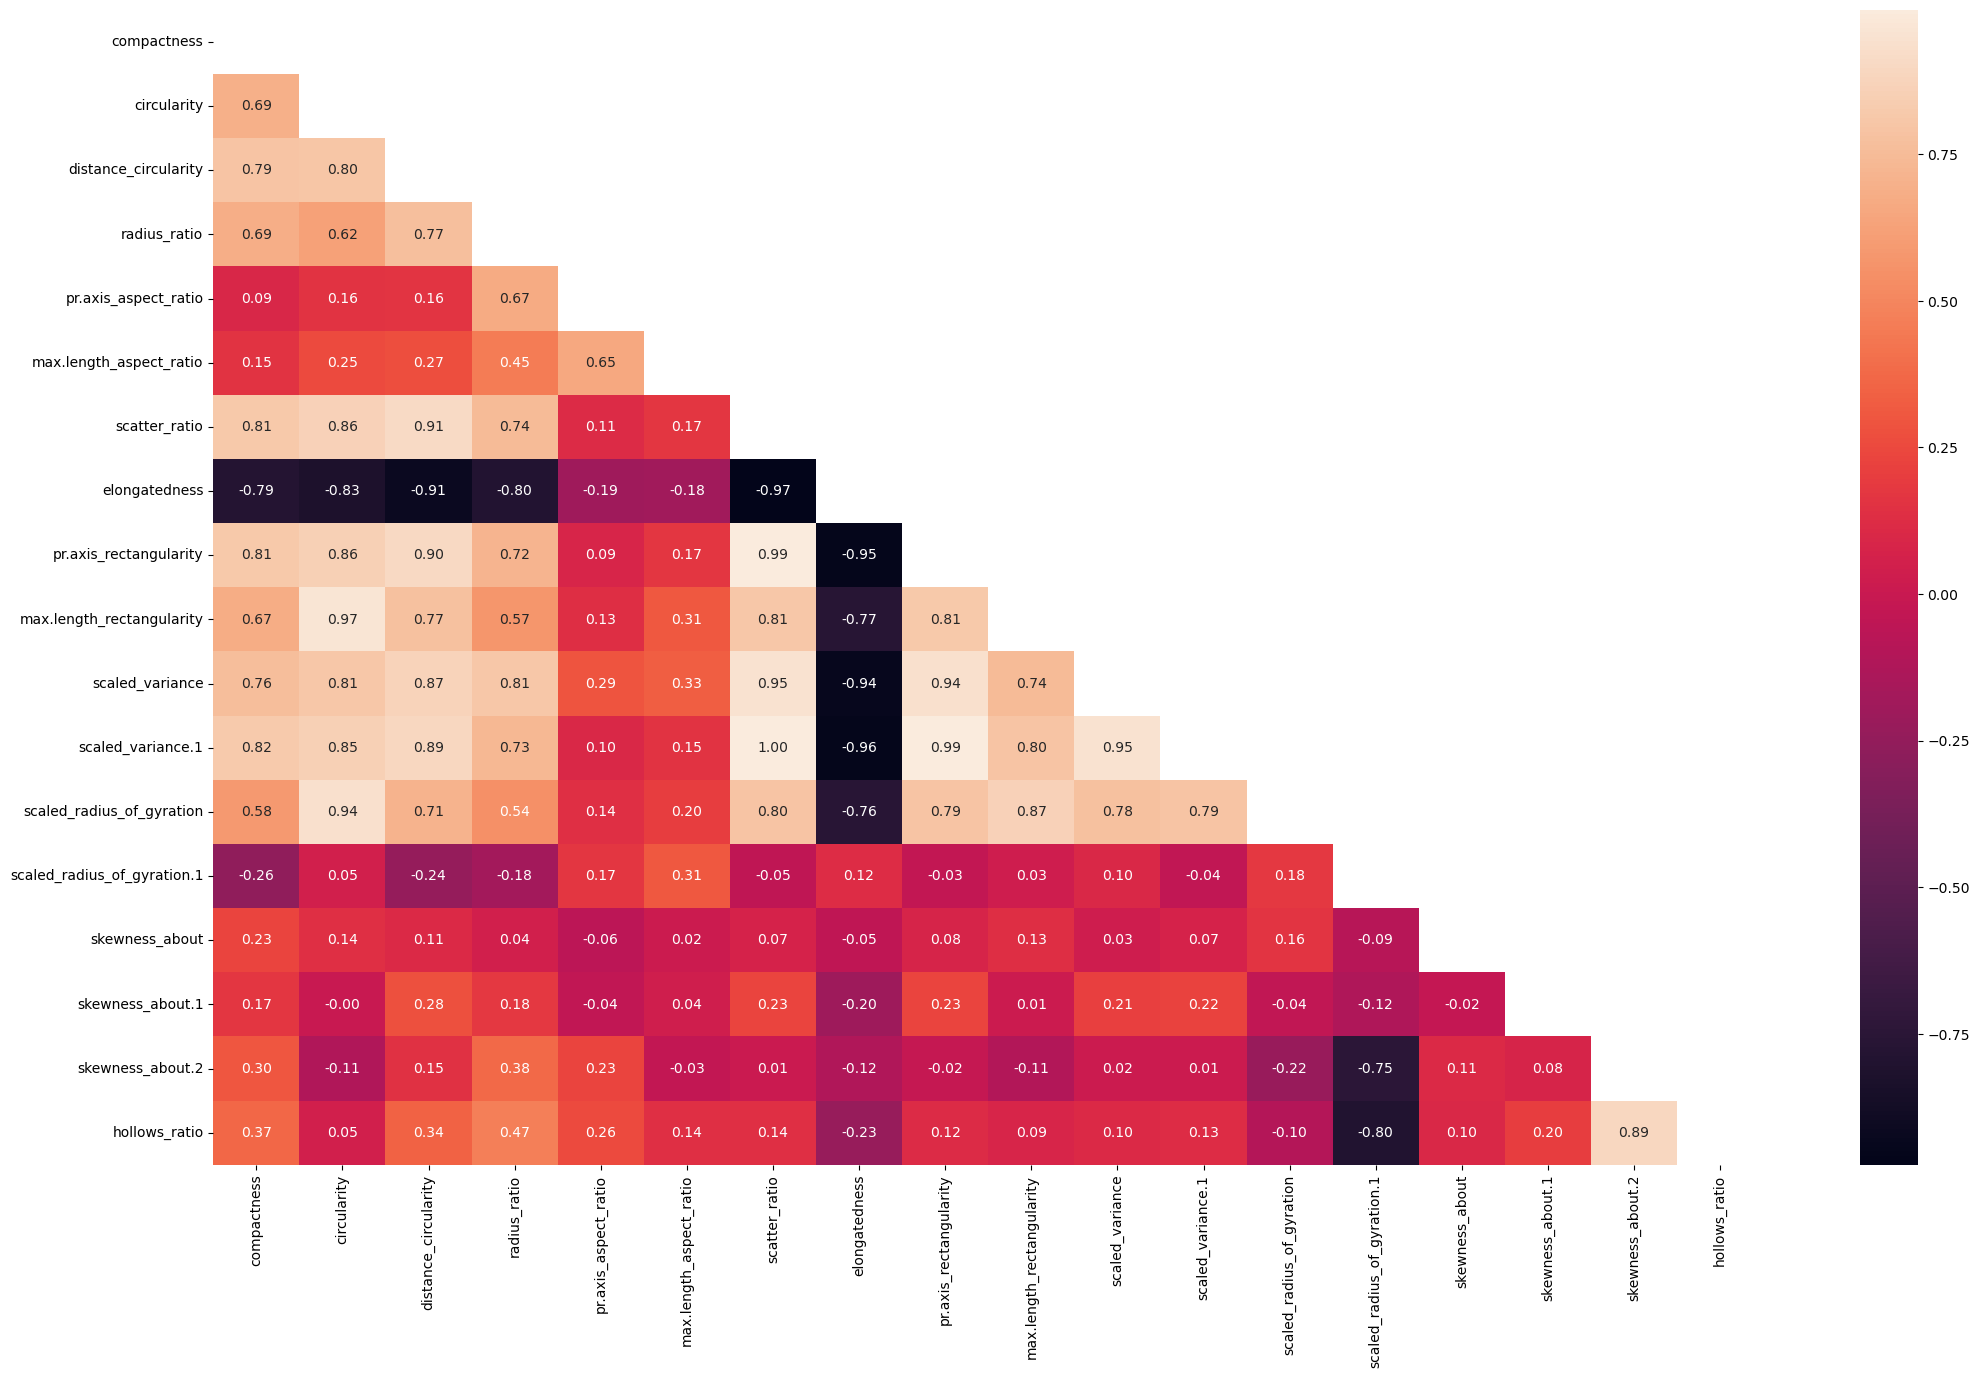

In [35]:
mask = np.triu(np.ones_like(x.corr()))
fig = plt.subplots(figsize=(25, 15))
sns.heatmap(x.corr(), annot=True,fmt='.2f',mask=mask)
plt.show()

In [ ]:
# High Multicollinearity exists

### Decision Tree with PCA

In [12]:
sc = StandardScaler()
df_scaled = pd.DataFrame(sc.fit_transform(x), columns = x.columns)
df_scaled

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,0.163231,0.520408,0.060669,0.275095,1.814935,0.801865,-0.198517,0.129648,-0.217151,0.766312,-0.397957,-0.339039,0.301676,-0.336861,-0.067703,0.372602,-0.321809,0.171837
1,-0.322874,-0.619123,0.124067,-0.847718,-0.750630,0.351180,-0.591720,0.514333,-0.606014,-0.337462,-0.591403,-0.619031,-0.502972,-0.025824,0.550749,0.148005,0.003400,0.442318
2,1.256966,0.845988,1.518823,1.215831,0.788709,0.801865,1.162569,-1.152637,0.949438,0.697326,1.117373,1.123780,1.415804,0.129694,1.581501,-0.413488,-0.159204,0.036596
3,-0.079822,-0.619123,-0.002729,-0.301485,0.275596,0.351180,-0.742952,0.642562,-0.606014,-0.337462,-0.913814,-0.739028,-1.462359,-1.425488,-0.067703,-0.301190,1.629444,1.524243
4,-1.052030,-0.130753,-0.763506,1.094445,2.670123,2.829947,-0.591720,0.514333,-0.606014,-0.268476,1.697712,-0.647602,0.425468,2.306950,0.550749,-0.188891,-1.460039,-1.721531
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
808,-0.079822,-0.944703,0.314261,0.426827,0.446633,-0.099505,0.013207,-0.126809,-0.217151,-0.958335,0.375828,-0.093331,-0.781504,-0.025824,0.138448,1.383290,-0.159204,-0.098644
809,-0.565926,0.194828,0.124067,-0.180100,0.788709,1.252550,-0.289256,0.257876,-0.217151,0.766312,-0.494680,-0.401894,0.054092,-0.025824,-1.098455,0.821797,-0.484413,0.171837
810,1.500018,1.497149,1.201833,1.610333,0.959747,1.703235,1.616264,-1.409094,1.727163,1.732113,1.278578,1.615196,0.796844,-0.336861,-0.686154,-0.974982,-0.321809,0.712800
811,-0.930504,-1.433074,-0.256321,-0.695987,-0.579593,-0.550191,-1.015169,1.155476,-0.994877,-1.648193,-1.075019,-0.961880,-0.812452,-0.958934,-1.304605,1.383290,0.166004,-0.098644


In [59]:
pca = PCA(random_state= 10)
df_pca = pd.DataFrame(pca.fit_transform(df_scaled))
df_pca

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.352249,-0.141027,0.961832,0.190872,0.069616,-0.740301,-0.882080,-0.388323,-0.908189,0.087236,0.011048,0.035379,-0.185637,-0.202200,0.184974,0.091062,-0.020625,-0.047769
1,-1.578072,-0.422197,-0.365261,0.239334,0.685899,-0.530580,0.345639,0.258324,0.137883,-0.093291,0.497768,-0.265891,-0.040406,-0.070293,0.070994,-0.036181,0.040015,0.026009
2,3.782556,0.253257,0.061756,1.216416,0.717337,0.728388,-0.015941,0.478896,-0.275968,-0.477401,0.258087,-0.144333,-0.058469,-0.061558,-0.001669,-0.127062,0.170354,-0.014654
3,-1.713214,-2.819496,0.186835,0.379588,-0.357389,-0.514101,0.450872,-0.011059,-0.061825,0.456355,0.374730,0.029172,0.191231,-0.235635,-0.079262,0.098868,-0.087823,0.000887
4,0.532165,5.153595,11.400516,0.066717,3.242363,-0.360525,2.569695,-0.400351,2.111091,-0.332323,0.201103,-0.137255,-0.131083,-0.379950,-0.346862,0.167944,-0.037006,0.013389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
808,-0.420214,-0.579732,0.197542,-1.445859,1.069931,0.804298,-0.032025,0.508775,-0.300121,-0.171235,0.212792,0.124564,-0.102418,0.188687,0.193063,0.012065,0.070978,-0.035742
809,-0.295035,0.223473,0.739082,-0.891889,-0.246193,-1.435235,-0.625594,-0.158588,-0.357558,0.204662,0.140138,-0.024122,-0.050747,-0.166501,0.119523,-0.128558,-0.013747,-0.011603
810,4.831130,0.073236,0.489974,0.317896,-1.359239,-0.195120,0.599520,0.127670,-0.615469,0.547725,-0.313539,-0.391192,0.061541,0.234067,0.027040,-0.049411,-0.024014,-0.004766
811,-3.269416,-1.018665,-0.343441,-1.927256,0.047640,-0.423563,-0.241143,0.314877,-0.220229,-0.887517,-0.051958,0.214722,0.245781,-0.285539,-0.111335,-0.074619,0.066231,-0.011473


### Scree Plot

Text(0, 0.5, 'Explained variance')

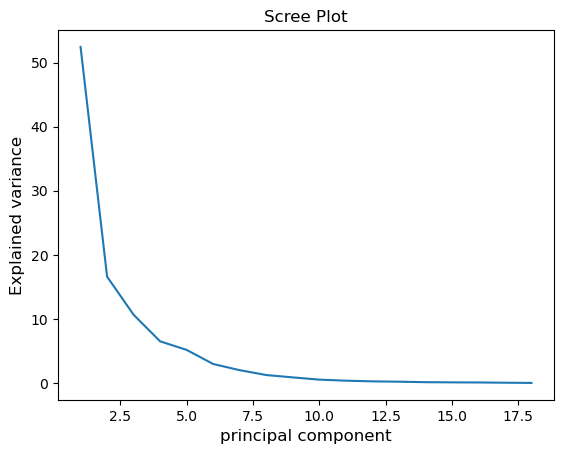

In [39]:
evr = pca.explained_variance_ratio_*100
evrcs = np.cumsum(evr)*100
sns.lineplot(x = range(1,19), y = evr)
plt.title('Scree Plot', fontsize=12)
plt.xlabel("principal component", fontsize=12)
plt.ylabel("Explained variance", fontsize=12)

### Business Rule

In [41]:
eig_val = pca.explained_variance_
var_exp = [(i/18)*100 for i in sorted(eig_val, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
cum_var_exp

array([ 52.51881666,  69.12781041,  79.78162825,  86.28227803,
        91.44391426,  94.40042038,  96.39527466,  97.63061258,
        98.4977967 ,  99.01345848,  99.36639905,  99.61302161,
        99.80614593,  99.92398106, 100.01351041, 100.08633263,
       100.12112014, 100.12315271])

In [ ]:
# Business Rule indicating to use 4 PCs as they explain 80% of the variance

In [13]:
pca = PCA(n_components= 0.8, random_state= 10)
df_pca = pd.DataFrame(pca.fit_transform(df_scaled))
df_pca

,0,1,2,3
0,0.556908,-0.542515,1.129115,-0.403449
1,-1.517672,-0.374168,-0.582221,0.929660
2,3.884148,0.268596,0.712210,0.978031
3,-1.546859,-3.003269,0.161344,0.411144
4,0.053880,1.854078,2.549616,-1.273745
...,...,...,...,...
808,-0.390320,-0.609276,-1.145535,-0.944087
809,-0.070091,-0.075951,0.241305,-0.929348
810,5.067492,-0.053841,1.230528,-0.436219
811,-3.281742,-1.069457,-1.563540,-1.163242


In [14]:
df_pca = df_pca.rename(columns={0:'PC1',1:'PC2',2:'PC3',  3:'PC4'})

<Axes: >

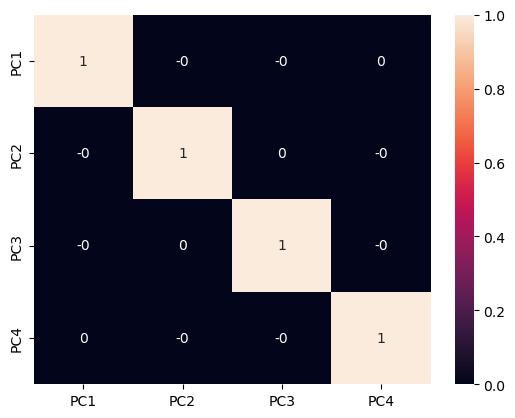

In [15]:
sns.heatmap(np.round(df_pca.corr()), annot= True)

In [ ]:
# There is no Multicollinearity

In [18]:
pca = PCA(n_components= 0.8, random_state= 10)
pca_train = pca.fit_transform(xtrain)
pca_test = pca.transform(xtest)

In [48]:
dt= DecisionTreeClassifier(random_state=100)
dt.fit(pca_train,ytrain)

y_pred_pc=dt.predict(pca_test)

print(accuracy_score(ytest,y_pred_pc))
print(confusion_matrix(ytest,y_pred_pc))

0.8711656441717791
[[71 12]
 [ 9 71]]


### PCA Coefficients

In [77]:
df_pca_laoding=pd.DataFrame(pca.components_, columns=list(df_scaled))
df_pca_laoding

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,0.274447,0.294004,0.304380,0.268889,0.083020,0.098483,0.316689,-0.313205,0.313612,0.281286,0.309162,0.314164,0.270337,-0.025604,0.039680,0.063160,0.030941,0.079366
1,-0.127106,0.134430,-0.072145,-0.176416,-0.098763,0.030207,0.044390,0.015254,0.057231,0.120324,0.061910,0.048021,0.210170,0.493794,-0.056260,-0.121035,-0.544492,-0.538882
2,-0.115778,-0.036451,-0.055188,0.281805,0.645769,0.586412,-0.098585,0.056652,-0.112039,-0.024132,0.059723,-0.109453,-0.037063,0.275780,-0.110192,-0.080499,0.031728,0.056946
3,0.080077,0.190342,-0.069371,-0.044651,0.030053,0.029750,-0.094417,0.085067,-0.091897,0.192294,-0.119476,-0.091318,0.204887,-0.071533,0.605083,-0.662058,0.101853,0.051579
4,0.070197,-0.086673,0.038959,-0.043663,-0.038468,0.212001,-0.017016,0.075823,0.000739,-0.064243,0.002564,-0.019443,-0.063195,0.149127,0.729058,0.599762,-0.094108,-0.028860
5,0.141269,-0.278132,-0.136323,0.255012,0.237902,-0.438916,0.116490,-0.147679,0.091503,-0.462569,0.230563,0.152146,-0.133617,0.232402,0.206512,-0.194571,0.146275,-0.249059
6,0.478882,-0.232113,0.060174,-0.169695,-0.385741,0.485306,0.065837,0.015051,0.097730,-0.107288,0.114298,0.082243,-0.391192,0.117229,-0.077334,-0.285756,0.014073,0.000162
7,-0.551289,-0.177147,0.436496,0.097423,-0.076288,0.173622,0.102868,-0.216261,0.070435,-0.251591,0.048844,0.036091,-0.124748,-0.340135,0.156635,-0.213790,-0.311235,-0.032482


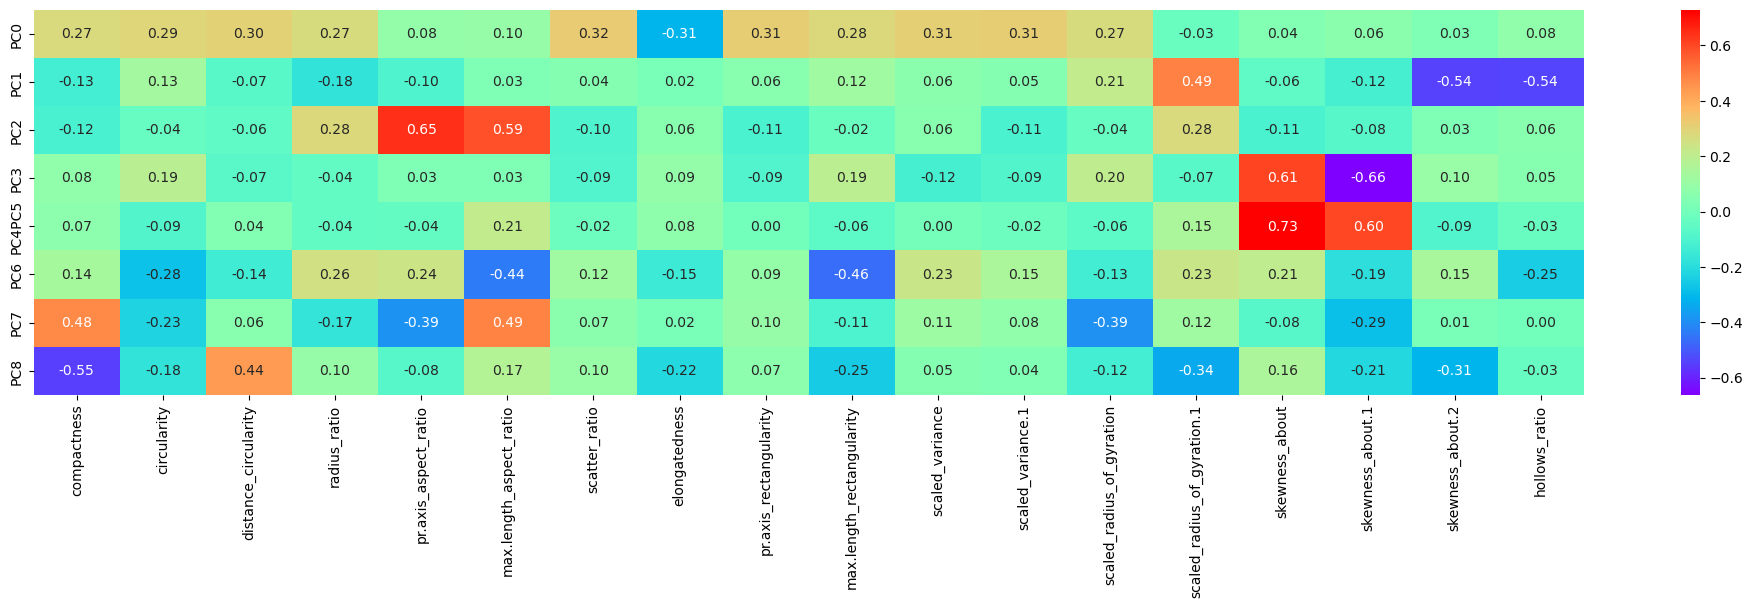

In [82]:
plt.figure(figsize=(25,5))
sns.heatmap(df_pca_laoding,cmap='rainbow',annot=True,fmt='.2f',yticklabels=['PC0','PC1','PC2','PC3','PC4''PC5','PC6','PC7','PC8'])
plt.show()

### LDA

In [49]:
lda = LDA(n_components= 1)
lda_train = lda.fit_transform(xtrain, ytrain)
lda_test = lda.transform(xtest)

In [50]:
dt_lda = DecisionTreeClassifier(random_state= 10)
dt_lda.fit(lda_train, ytrain)
ypred_lda = dt_lda.predict(lda_test)
print(classification_report(ytest, ypred_lda))

              precision    recall  f1-score   support

     Non_car       0.90      0.89      0.90        83
         car       0.89      0.90      0.89        80

    accuracy                           0.90       163
   macro avg       0.90      0.90      0.90       163
weighted avg       0.90      0.90      0.90       163



### LDA as Model

In [51]:
lda = LDA()
lda.fit_transform(xtrain, ytrain)
ypred_lda = lda.predict(xtest)
print(classification_report(ytest, ypred_lda))

              precision    recall  f1-score   support

     Non_car       0.94      0.92      0.93        83
         car       0.91      0.94      0.93        80

    accuracy                           0.93       163
   macro avg       0.93      0.93      0.93       163
weighted avg       0.93      0.93      0.93       163



### KMeans Clustering

In [64]:
wcss = []
for i in range(2,16):
    km = KMeans(n_clusters=i)
    km.fit(df_pca)
    wcss.append(km.inertia_)

In [65]:
clusters_df = pd.DataFrame({'num_clusters': range(2,16), 'Inertia': wcss})
clusters_df

,num_clusters,Inertia
0,2,8260.412059
1,3,6680.032935
2,4,5387.611297
3,5,4860.065869
4,6,4364.067710
5,7,4137.827284
6,8,3919.855602
7,9,3678.141433
8,10,3395.533788
9,11,3283.998535


### Elbow Plot

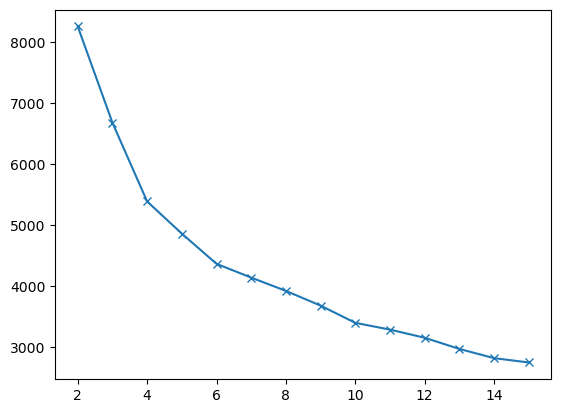

In [66]:
plt.plot(clusters_df['num_clusters'],clusters_df['Inertia'], marker = 'x')

### Silhoutte Score

In [21]:
n_clusters = [2,3,4,5,6,7,8,9,10]
sil_score = []
for K in n_clusters:
    kmns = KMeans(n_clusters = K, random_state= 10)
    kmns.fit(df_pca)
    label = kmns.labels_
    score = silhouette_score(df_pca, label, random_state= 10)
    sil_score.append(score)
    print('For {} clusters the silhoutte score is {}'.format(K, score))

For 2 clusters the silhoutte score is 0.432816946204118
For 3 clusters the silhoutte score is 0.3525428313072469
For 4 clusters the silhoutte score is 0.3006759713104269
For 5 clusters the silhoutte score is 0.2700397550509944
For 6 clusters the silhoutte score is 0.2698680032069775
For 7 clusters the silhoutte score is 0.2680733585399182
For 8 clusters the silhoutte score is 0.23526583107204163
For 9 clusters the silhoutte score is 0.2185967824472287
For 10 clusters the silhoutte score is 0.23818205357652622


In [ ]:
# Silhoutte score is highest for 2 clusters

In [22]:
km=KMeans(n_clusters=2)
km.fit(df_pca)
df_pca['Labels']=km.labels_
df_pca.head()

,PC1,PC2,PC3,PC4,Labels
0,0.556908,-0.542515,1.129115,-0.403449,0
1,-1.517672,-0.374168,-0.582221,0.929660,0
2,3.884148,0.268596,0.712210,0.978031,1
3,-1.546859,-3.003269,0.161344,0.411144,0
4,0.053880,1.854078,2.549616,-1.273745,0


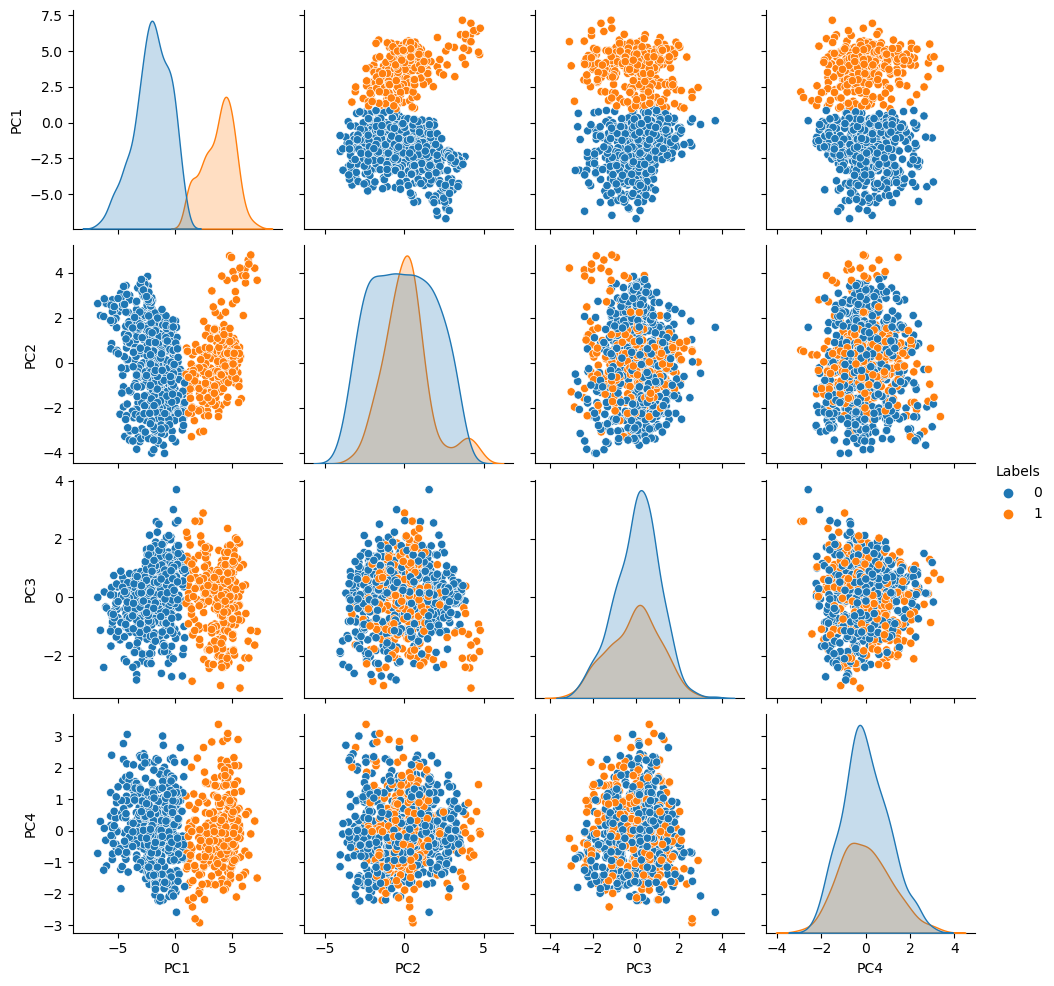

In [23]:
sns.pairplot(df_pca, hue = 'Labels', diag_kind= 'kde')